In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [26]:
dt = pd.read_csv('data/Position_Salaries.csv')
dt.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [27]:
X = dt[['Level']]
y = dt['Salary']

# Simple Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(),LinearRegression())
model.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

### Graph of Linear Regression

In [29]:
y_pred = model.predict(X)
y_pred.shape

(5,)

<function matplotlib.pyplot.show(close=None, block=None)>

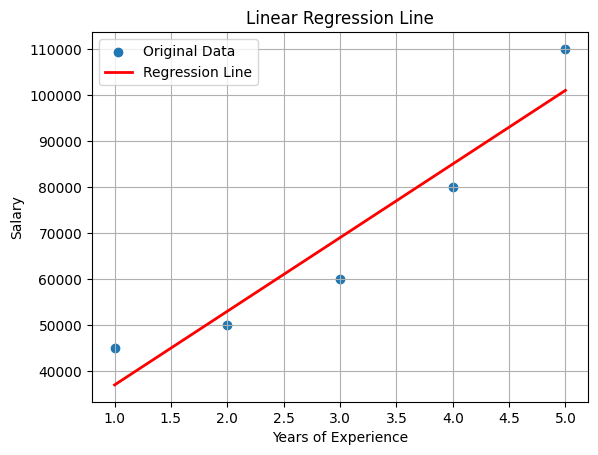

In [30]:
plt.scatter(X, y, label='Original Data')
plt.plot(X, y_pred, color='red', linewidth=2, label = 'Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title("Linear Regression Line")
plt.grid(True)
plt.legend()
plt.show

# Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures #fitting polynomial regression to the data set

md1 = PolynomialFeatures(degree=5) #degree represents highest degree of polynomial features
X_poly = md1.fit_transform(X) #transforming X into 4 column features of polynomials of input values

model.fit(X_poly, y)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

LinearRegression()

### Grapg of Polynomial regression

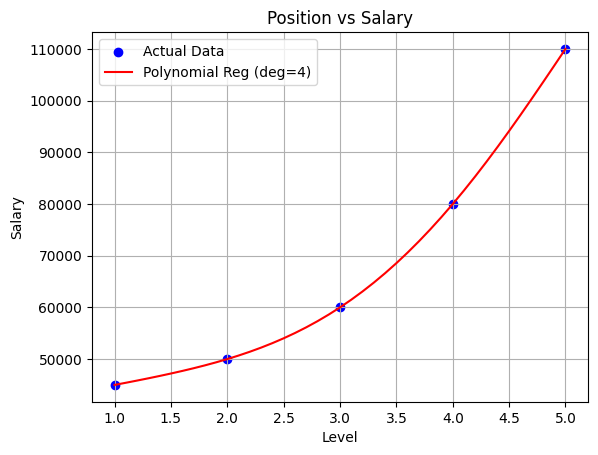

In [32]:
plt.scatter(X, y, color='blue', label='Actual Data')

# Polynomial Regression Line (smoother curve)
X_grid = np.arange(min(X.Level), max(X.Level)+0.1, 0.1).reshape(-1, 1)
X_grid_poly = md1.transform(X_grid)
plt.plot(X_grid, poly_reg.predict(X_grid_poly), color='red', label='Polynomial Reg (deg=4)')

plt.title('Position vs Salary')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()